## Importing Important Library To Handle The Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import gc
import datetime 


## Loading My Dataset To Be Used

In [2]:
df = pd.read_csv('Ecommerce.csv', encoding = 'ISO-8859-1')


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [8]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Cleaning

## Checking For Missing Values

In [9]:
df.isnull().sum()        # check missing values for each column 

invoice_num          0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
cust_id         135080
country              0
dtype: int64

In [10]:
df[df.isnull().any(axis=1)].head()   # check out the rows with missing values

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [11]:
df['InvoiceDate'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M') 
#change the invoice_date format - String to Timestamp format

In [12]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,InvoiceDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


## Remove rows with missing values

In [13]:
# df_new without missing values
df_new = df.dropna()

In [14]:
# check missing values for each column 
df_new.isnull().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
InvoiceDate     0
dtype: int64

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  object        
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
 8   InvoiceDate   406829 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [16]:
# change columns tyoe - String to Int type 
df_new['cust_id'] = df_new['cust_id'].astype('int64')

In [17]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,InvoiceDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00


In [18]:
df_new.describe()

,quantity,unit_price,cust_id
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Remove Quantity with negative values

In [19]:

df_new = df_new[df_new. quantity > 0]

In [20]:
df_new.describe()

,quantity,unit_price,cust_id
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## Add the column - amount_spent

In [21]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [22]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,InvoiceDate,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34


In [23]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

## Add the columns - Month, Day and Hour for the invoice

In [24]:
#Year Column Added
df_new['year'] = pd.DatetimeIndex(df_new['invoice_date']).year
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,year
0,536365,12/1/2010 8:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010
1,536365,12/1/2010 8:26,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010
2,536365,12/1/2010 8:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010
3,536365,12/1/2010 8:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010
4,536365,12/1/2010 8:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010


In [25]:
#Month Column Added
df_new['month'] = pd.DatetimeIndex(df_new['invoice_date']).month
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,year,month
0,536365,12/1/2010 8:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010,12
1,536365,12/1/2010 8:26,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010,12
2,536365,12/1/2010 8:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010,12
3,536365,12/1/2010 8:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010,12
4,536365,12/1/2010 8:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010,12


In [26]:
df_new['year_month'] = pd.to_datetime(df_new['invoice_date']).dt.to_period('M')
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,year,month,year_month
0,536365,12/1/2010 8:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010,12,2010-12
1,536365,12/1/2010 8:26,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12
2,536365,12/1/2010 8:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010,12,2010-12
3,536365,12/1/2010 8:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12
4,536365,12/1/2010 8:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12


In [27]:
df_new['day'] = pd.DatetimeIndex(df_new['invoice_date']).day
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,year,month,year_month,day
0,536365,12/1/2010 8:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010,12,2010-12,1
1,536365,12/1/2010 8:26,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1
2,536365,12/1/2010 8:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010,12,2010-12,1
3,536365,12/1/2010 8:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1
4,536365,12/1/2010 8:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1


In [28]:
df_new['hour'] = pd.DatetimeIndex(df_new['invoice_date']).hour
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,year,month,year_month,day,hour
0,536365,12/1/2010 8:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010,12,2010-12,1,8
1,536365,12/1/2010 8:26,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1,8
2,536365,12/1/2010 8:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010,12,2010-12,1,8
3,536365,12/1/2010 8:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1,8
4,536365,12/1/2010 8:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1,8


# Exploratory Data Analysis (EDA)

## How many orders made by the customers?

In [29]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


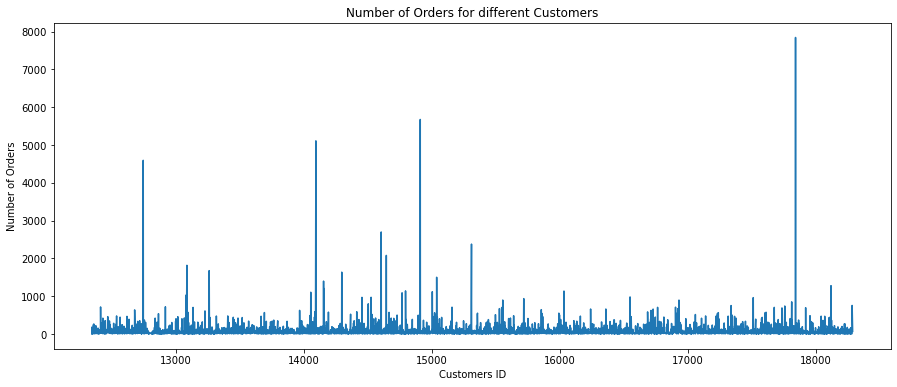

In [30]:

orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

## Check TOP 5 most number of orders

In [31]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


## How much money spent by the customers?

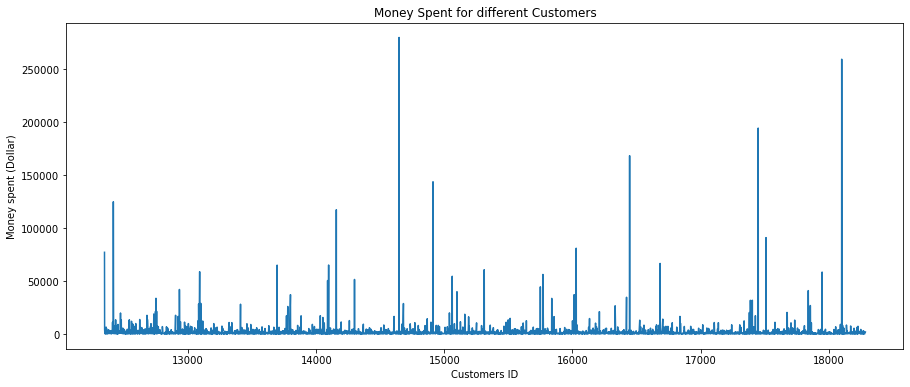

In [32]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

## Check TOP 5 highest money spent

In [33]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


## Discover patterns for Number of Orders

### How many orders (per month)?

In [34]:
%matplotlib inline
color = sns.color_palette()

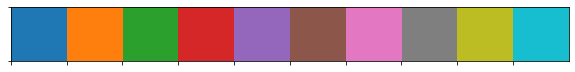

In [35]:
# color available
sns.palplot(color)

In [36]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,year,month,year_month,day,hour
0,536365,12/1/2010 8:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010,12,2010-12,1,8
1,536365,12/1/2010 8:26,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1,8
2,536365,12/1/2010 8:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010,12,2010-12,1,8
3,536365,12/1/2010 8:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1,8
4,536365,12/1/2010 8:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1,8


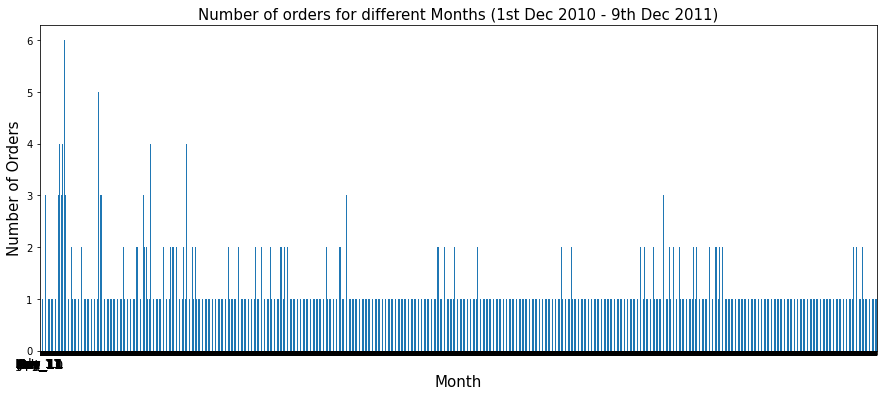

In [37]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## How many orders (per day)?

In [38]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

[1]     709
[2]     613
[3]     520
[4]     629
[5]     723
[6]     801
[7]     773
[8]     771
[9]     660
[10]    627
[11]    629
[12]    507
[13]    596
[14]    670
[15]    553
[16]    650
[17]    694
[18]    572
[19]    519
[20]    661
[21]    594
[22]    564
[23]    579
[24]    583
[25]    562
[26]    447
[27]    546
[28]    624
[29]    404
[30]    443
[31]    313
Name: day, dtype: int64

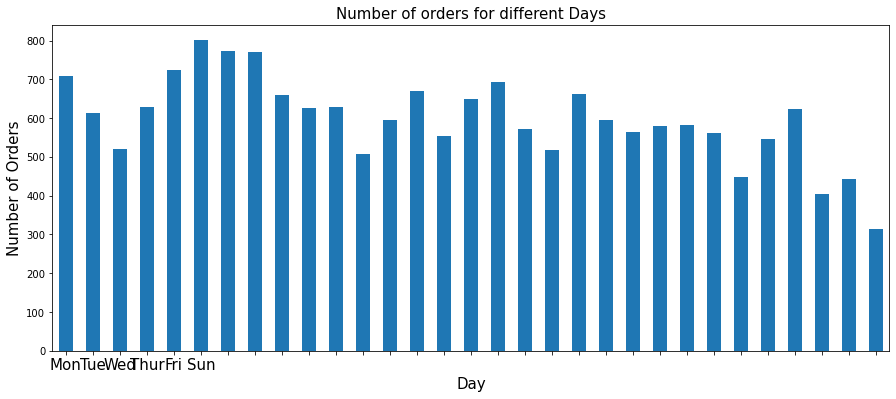

In [39]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

## How many orders (per hour)?

In [40]:
df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

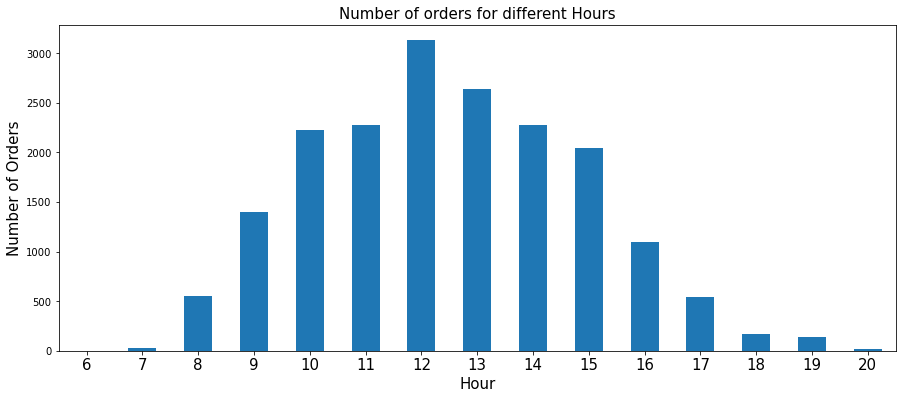

In [41]:
ax = df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

## Discover patterns for Unit Price

In [42]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

**We see that there are unit price = 0 (FREE items)**

There are some free items given to customers from time to time.

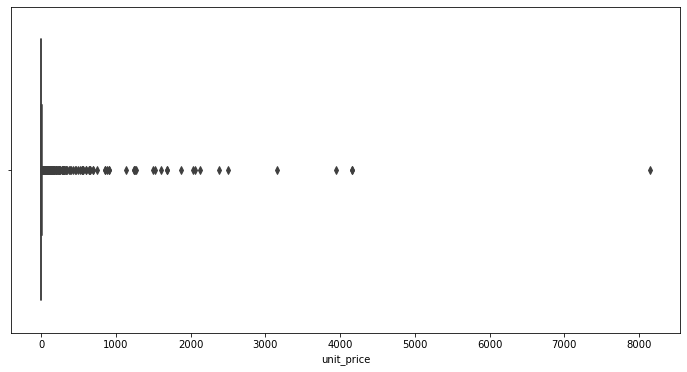

In [43]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

In [44]:
df_free = df_new[df_new.unit_price == 0]

In [45]:
df_free.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,year,month,year_month,day,hour
9302,537197,12/5/2010 14:02,22841,ROUND CAKE TIN VINTAGE GREEN,1,0.0,0.0,12647,Germany,2010,12,2010-12,5,14
33576,539263,12/16/2010 14:36,22580,ADVENT CALENDAR GINGHAM SACK,4,0.0,0.0,16560,United Kingdom,2010,12,2010-12,16,14
40089,539722,12/21/2010 13:45,22423,REGENCY CAKESTAND 3 TIER,10,0.0,0.0,14911,EIRE,2010,12,2010-12,21,13
47068,540372,1/6/2011 16:41,22090,PAPER BUNTING RETROSPOT,24,0.0,0.0,13081,United Kingdom,2011,1,2011-01,6,16
47070,540372,1/6/2011 16:41,22553,PLASTERS IN TIN SKULLS,24,0.0,0.0,13081,United Kingdom,2011,1,2011-01,6,16


In [46]:
df_free.year_month.value_counts().sort_index()

2010-12     3
2011-01     3
2011-02     1
2011-03     2
2011-04     2
2011-05     2
2011-07     2
2011-08     6
2011-09     2
2011-10     3
2011-11    14
Freq: M, Name: year_month, dtype: int64

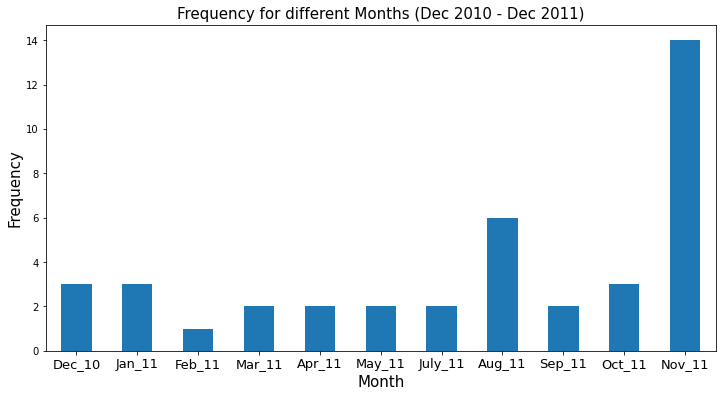

In [47]:
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()


**Not clear why there are FREE items given to certain customers**

On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011)

# Discover patterns for each Country

In [48]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country,year,month,year_month,day,hour
0,536365,12/1/2010 8:26,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,2010,12,2010-12,1,8
1,536365,12/1/2010 8:26,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1,8
2,536365,12/1/2010 8:26,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,2010,12,2010-12,1,8
3,536365,12/1/2010 8:26,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1,8
4,536365,12/1/2010 8:26,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,2010,12,2010-12,1,8


## How many orders for each country?

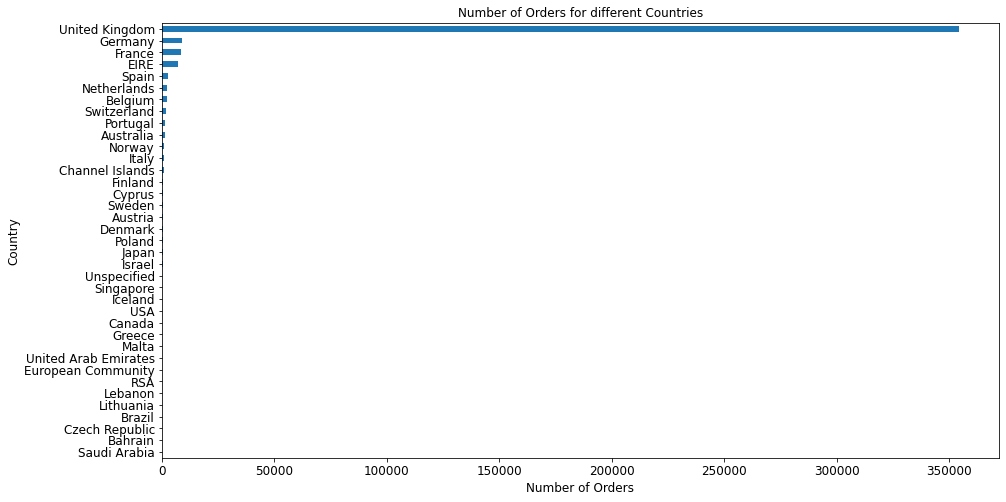

In [49]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

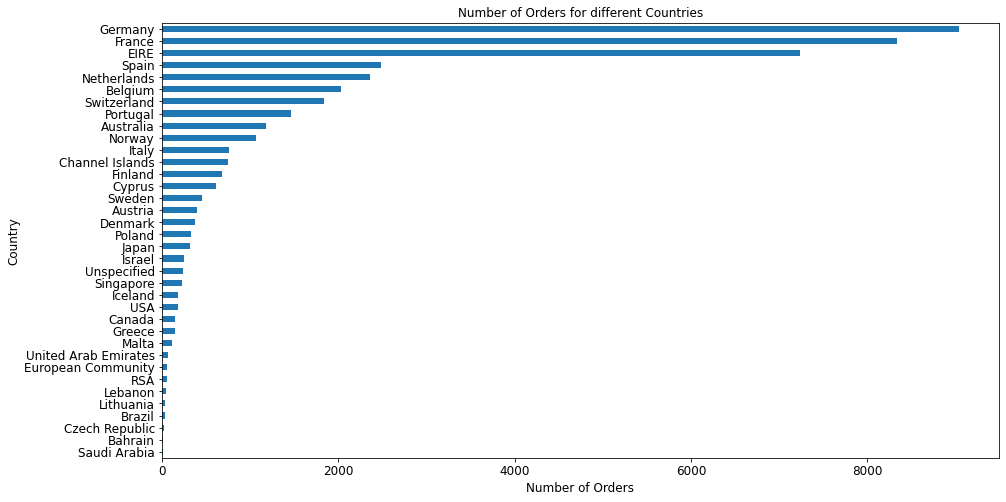

In [50]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

## How much money spent by each country?

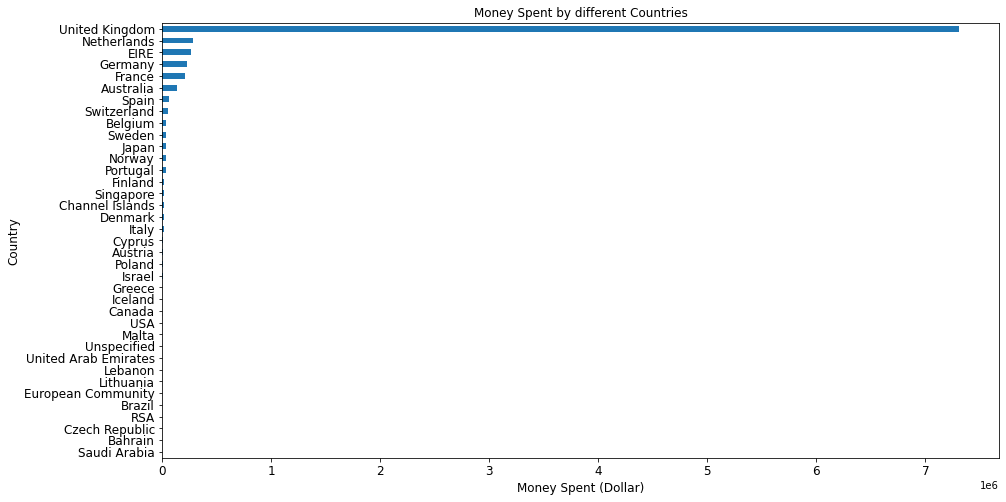

In [51]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

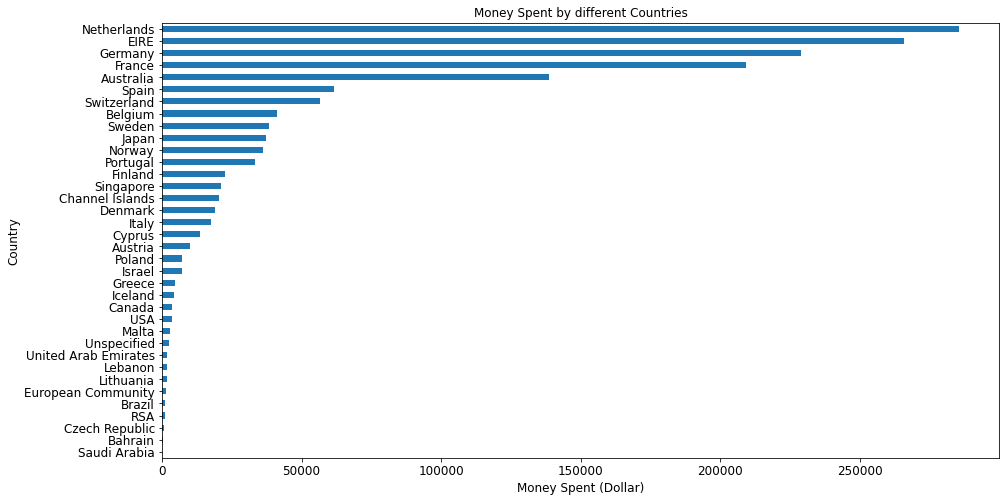

In [52]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()